In [ ]:
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tomato = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Tomato Nepali Big.csv')
gourd = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Bitter Gourd.csv')
cabbage = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Cabbage Local.csv')
cauli = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Cauliflower Local.csv')
leaf = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Spanich Leaf.csv')
diesel= pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Diesel-Monthly-Price-NPR-per-Gallon.csv')
dap = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/DAP-Monthly-Price-Nepalese-Rupee-per-Metric-Ton.csv')
urea = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/Urea-Monthly-Price-Nepalese-Rupee-per-Metric-Ton.csv')
meter_data = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/yearly_monthly_averages.csv')
preci_day_data = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/precipitation_larc.csv')
temp_day_data = pd.read_csv('drive/MyDrive/gdrive_folder/vegetable/Data CSV/temperature_larc.csv')
data_list = [tomato,gourd,cabbage,cauli,leaf]

In [ ]:
#for daily data
metero_data = pd.DataFrame()
date_range = pd.date_range('2009-01-01', periods=12*11, freq='M')
metero_data['Date'] = date_range
metero_data = metero_data.set_index('Date')
metero_data['avg_temp'] = meter_data.avgtempC.to_list()
metero_data['avg_rain_mm'] = meter_data.rainMM.to_list()
metero_data['avg_rain_days'] = meter_data.rain_days.to_list()
metero_data['humidity'] = meter_data.humidity.to_list()
metero_data = metero_data.resample("D").ffill()

In [ ]:
#for daily data
metero_data = pd.DataFrame()
date_range = pd.date_range('2010-01-01', periods=3717, freq='D')
metero_data['Date'] = date_range
metero_data = metero_data.set_index('Date')
metero_data['avg_temp'] = temp_day_data.T2M_RANGE.to_list()
metero_data['avg_rain_mm'] = preci_day_data.PRECTOT.to_list()
metero_data['humidity'] = temp_day_data.QV2M.to_list()
metero_data = metero_data.resample("D").ffill()

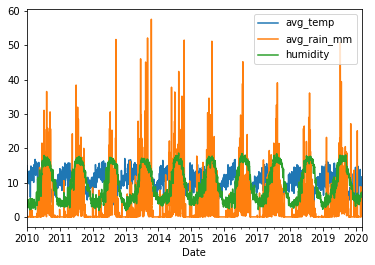

In [ ]:
metero_data.plot()

In [ ]:
def make_data(data_list):
  veg_data = pd.DataFrame()
  name_list = ['tomato','gourd','cabbage','cauli','leaf']
  for i,veg in enumerate(data_list):
    veg['Date'] = pd.to_datetime(veg['Date'])
    veg = veg.drop(['Minimum','Maximum'],axis = 1)
    veg = veg.set_index('Date')
    veg = veg.resample('D').mean()
    if not 'Date' in veg_data.columns:
      veg_data.insert(i,name_list[i],veg.Average)
  return veg_data

In [ ]:
veg_data = make_data(data_list)
veg_data

,tomato,gourd,cabbage,cauli,leaf
Date,,,,,
2013-04-15,24.0,50.0,10.0,24.0,48.0
2013-04-16,25.0,50.0,10.0,24.0,48.0
2013-04-17,27.0,53.0,9.0,NaN,38.0
2013-04-18,26.0,67.0,9.0,24.0,38.0
2013-04-19,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-10-07,42.0,236.5,67.0,105.0,90.0
2020-10-08,42.0,240.0,67.0,105.0,95.0
2020-10-09,45.0,285.0,65.0,105.0,100.0


In [ ]:
veg_data.isnull().values.sum()

1014

In [ ]:
veg_data = veg_data.fillna(method='ffill')

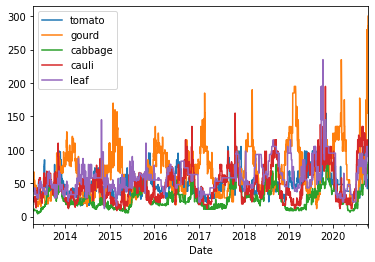

In [ ]:
veg_data.plot()

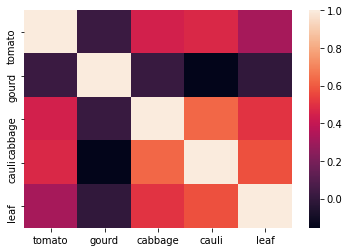

In [ ]:
sns.heatmap(veg_data.corr())

In [ ]:
def stra(strx):
    arr = []
    
    for a in strx.split(' '):
        newstr = ''
        try:
            for i in range(len(a)):
                if a[i] !='[' and a[i] !=']' and a[i] != ',':
                    newstr = newstr + a[i]
            newstr = float(newstr)   
            arr.append(newstr)
        except:
            pass
    return arr

In [ ]:
nV_data = pd.DataFrame()
val = [0]*len(dap)
for i in range(len(dap)):
  val[i] = stra(dap[' Price '][i])[0]
nV_data['Month'] = dap.Month
nV_data['DAP_Price'] = val
nV_data['Date'] = pd.to_datetime(nV_data['Month'])
nV_data = nV_data.drop(['Month'], axis = 1)
#nV_data = nV_data.resample('M').mean()
nV_data = nV_data.set_index('Date')

In [ ]:
nVdata = pd.DataFrame()
val = [0]*len(urea)
for i in range(len(urea)):
  val[i] = stra(urea[' Price '][i])[0]
nVdata['Month'] = urea.Month
nVdata['Price'] = val
nVdata['Date'] = pd.to_datetime(nVdata['Month'])
nVdata = nVdata.drop(['Month'], axis = 1)
#nV_data = nV_data.resample('M').mean()
nVdata = nVdata.set_index('Date')
nV_data.insert(1,'Urea_Price',nVdata['Price'])

In [ ]:
date = []
nVdata = pd.DataFrame()
val = [0]*len(diesel)
for i in range(len(diesel)):
  val[i] = stra(diesel['  Price  '][i])[0]
nVdata['Month'] = diesel.Month
nVdata['Price'] = val
nVdata['Date'] = pd.to_datetime(nVdata['Month'])
date = nVdata.Date
nVdata = nVdata.drop(['Month'], axis = 1)
#nV_data = nV_data.resample('M').mean()
nVdata = nVdata.set_index('Date')
nV_data.insert(2,'Diesel_Price',nVdata['Price'])

In [ ]:
nV_data.isnull().values.sum()

2

In [ ]:
nV_data = nV_data.fillna(method='bfill')

In [ ]:
from sklearn import preprocessing

In [ ]:
A = nV_data.values #returns an array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(A)

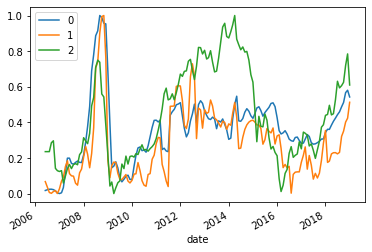

In [ ]:
normalized_dataframe = pd.DataFrame(x_scaled)
normalized_dataframe['date'] = date
normalized_dataframe = normalized_dataframe.set_index('date')
normalized_dataframe.plot()

In [ ]:
nVdata = nV_data.resample("D").ffill()

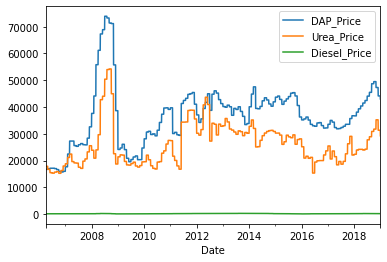

In [ ]:
nVdata.plot()

In [ ]:
def get_data_with_date_range(start_date,end_date,df):
  mask = (df.index > start_date) & (df.index <= end_date)
  return df.loc[mask]

In [ ]:
start_date = '2013-04-15'
end_date = '2019-01-01'
Fveg = get_data_with_date_range(start_date,end_date,veg_data)
Fnveg = get_data_with_date_range(start_date,end_date,nVdata)
Fmetro = get_data_with_date_range(start_date,end_date,metero_data)

In [ ]:
data = pd.concat([Fveg, Fnveg,Fmetro], axis=1)

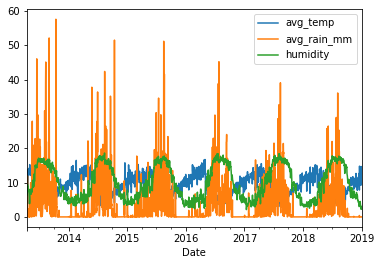

In [ ]:
Fmetro.plot()

In [ ]:
data

,tomato,gourd,cabbage,cauli,leaf,DAP_Price,Urea_Price,Diesel_Price,avg_temp,avg_rain_mm,humidity
Date,,,,,,,,,,,
2013-04-16,25.0,50.0,10.0,24.0,48.0,40105.32,31799.51,252.22,11.82,0.40,6.34
2013-04-17,27.0,53.0,9.0,24.0,38.0,40105.32,31799.51,252.22,12.24,0.03,7.51
2013-04-18,26.0,67.0,9.0,24.0,38.0,40105.32,31799.51,252.22,13.89,0.81,6.75
2013-04-19,26.0,67.0,9.0,24.0,38.0,40105.32,31799.51,252.22,12.16,1.17,6.85
2013-04-20,26.0,67.0,9.0,24.0,38.0,40105.32,31799.51,252.22,5.80,11.96,9.45
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-28,42.0,115.0,10.0,33.0,95.0,44145.48,31343.78,204.03,11.37,0.05,2.88
2018-12-29,48.0,110.0,11.0,33.0,95.0,44145.48,31343.78,204.03,14.70,0.00,2.22
2018-12-30,48.0,105.0,10.0,33.0,95.0,44145.48,31343.78,204.03,11.68,0.00,2.44


In [ ]:
veg_name = 'tomato'
data = data.drop(['gourd','cabbage','cauli','leaf'],axis = 1)

In [ ]:
data = data.resample('D').mean()

In [ ]:
veg_price_data = data[['tomato']]
veg_price_data= veg_price_data.shift(periods=7,fill_value= '0')
veg_prev_price = veg_price_data['tomato'].to_list()
data['prev_week_price'] = veg_prev_price

In [ ]:
start_date = '2013-04-22'
end_date = '2019-01-01'
data = get_data_with_date_range(start_date,end_date,data)

In [ ]:
data

,tomato,DAP_Price,Urea_Price,Diesel_Price,avg_temp,avg_rain_mm,humidity,prev_week_price
Date,,,,,,,,
2013-04-23,29.0,40105.32,31799.51,252.22,9.16,2.24,8.78,25
2013-04-24,29.0,40105.32,31799.51,252.22,10.76,0.97,8.67,27
2013-04-25,28.0,40105.32,31799.51,252.22,12.57,0.08,8.06,26
2013-04-26,28.0,40105.32,31799.51,252.22,12.45,0.33,7.95,26
2013-04-27,28.0,40105.32,31799.51,252.22,12.36,2.38,8.07,26
...,...,...,...,...,...,...,...,...
2018-12-28,42.0,44145.48,31343.78,204.03,11.37,0.05,2.88,38
2018-12-29,48.0,44145.48,31343.78,204.03,14.70,0.00,2.22,38
2018-12-30,48.0,44145.48,31343.78,204.03,11.68,0.00,2.44,38


Feature Engineering for the Model

Estimators use a system called feature columns to describe how the model should interpret each of the raw input features. An Estimator expects a vector of numeric inputs, and feature columns describe how the model should convert each feature.

Selecting and crafting the right set of feature columns is key to learning an effective model. A feature column can be either one of the raw inputs in the original features dict (a base feature column), or any new columns created using transformations defined over one or multiple base columns (a derived feature columns).

The linear estimator uses both numeric and categorical features. Feature columns work with all TensorFlow estimators and their purpose is to define the features used for modeling. Additionally, they provide some feature engineering capabilities like one-hot-encoding, normalization, and bucketization.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras import layers

Data Preprocessing

In [ ]:
features = data.values #returns an array
min_max_scaler = preprocessing.MinMaxScaler()
features = min_max_scaler.fit_transform(features)

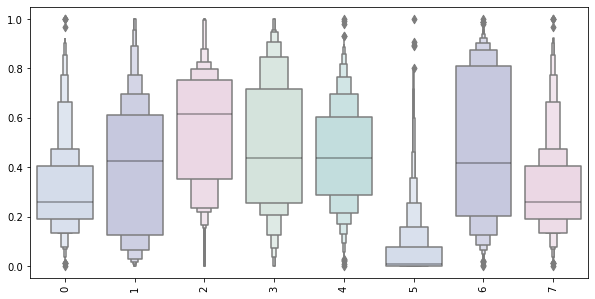

In [ ]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(10,5))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.columns

Index(['tomato', 'DAP_Price', 'Urea_Price', 'Diesel_Price', 'avg_temp',
       'avg_rain_mm', 'humidity', 'prev_week_price'],
      dtype='object')

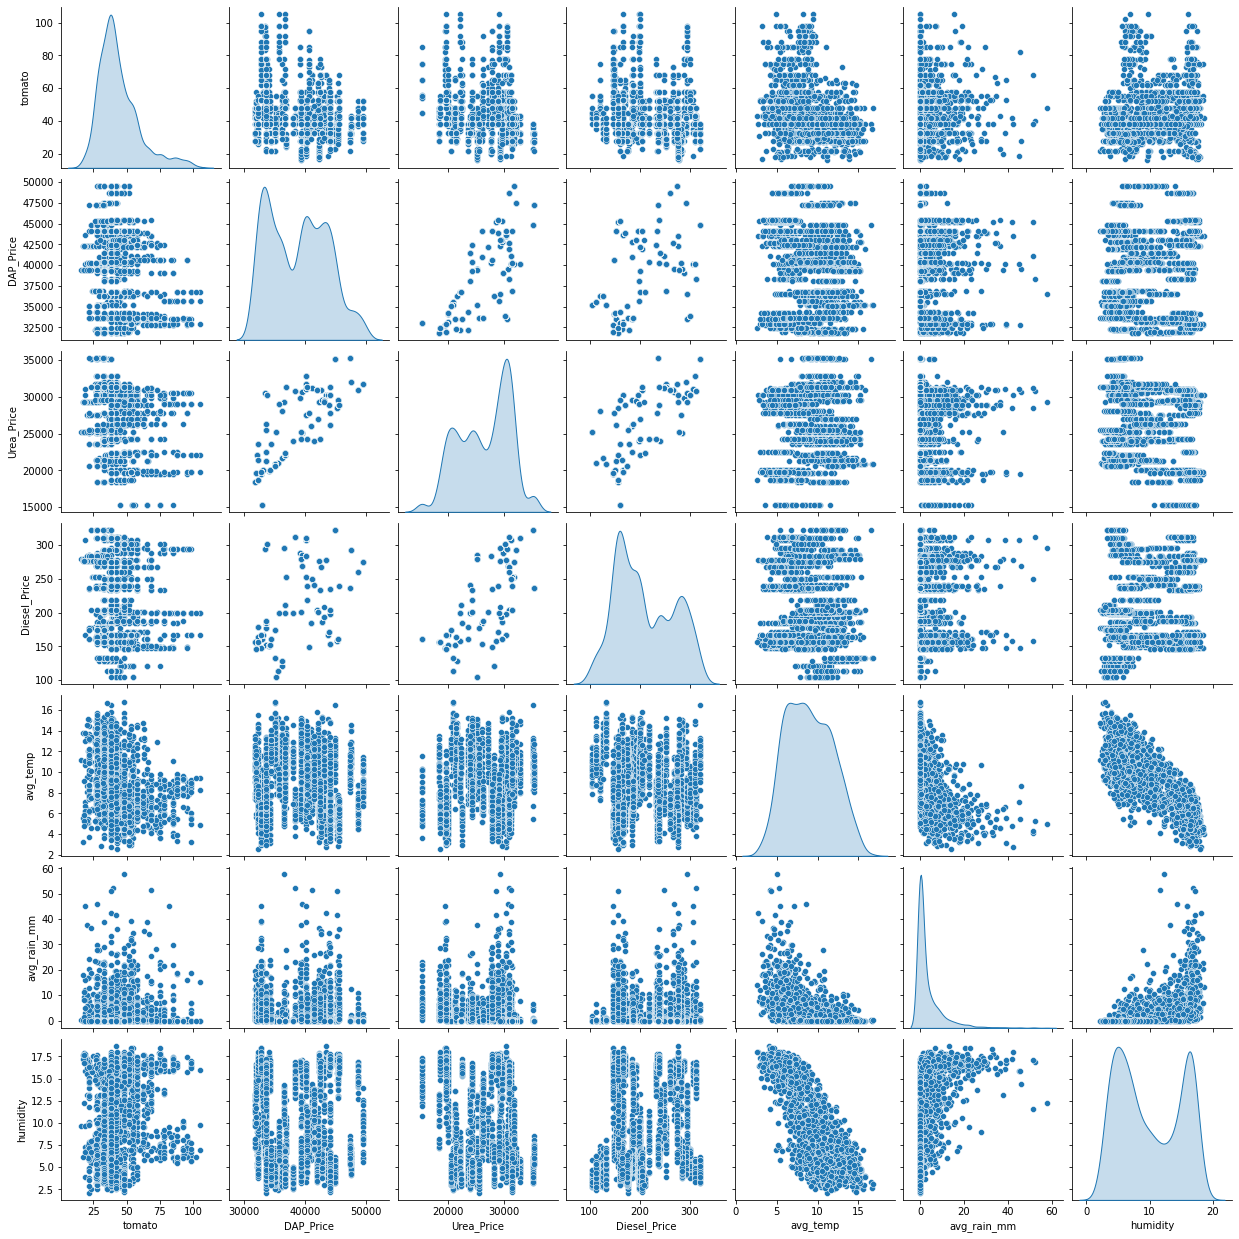

In [ ]:
#inspecting the data
sns.pairplot(data[['tomato', 'DAP_Price', 'Urea_Price', 'Diesel_Price', 'avg_temp',
       'avg_rain_mm', 'humidity']], diag_kind='kde')

Dap, urea nd diesel prices are seems to be coorelated, but tomato price seems to be independent 

In [ ]:
#lets split the data set as train and test
train_dataset, test_dataset = train_test_split(data, test_size=0.05)

In [ ]:
y_train = train_dataset.tomato
X_train = train_dataset.drop(['tomato'], axis = 1)
y_test = test_dataset.tomato
X_test = test_dataset.drop(['tomato'], axis = 1)

In [ ]:
X_train.shape

(1976, 7)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model =Sequential([
      layers.Dense(100,activation = 'relu',input_shape = X_train.shape[1:]),
      layers.Dense(200),
      layers.Dense(50),
      layers.Dense(100),
      layers.Dense(1),
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(X_train, y_train, epochs=700)

Epoch 1/700
62/62 [==============================] - 1s 1ms/step - loss: 1126.0768
Epoch 2/700
62/62 [==============================] - 0s 1ms/step - loss: 160.8857
Epoch 3/700
62/62 [==============================] - 0s 1ms/step - loss: 143.8895
Epoch 4/700
62/62 [==============================] - 0s 1ms/step - loss: 124.5574
Epoch 5/700
62/62 [==============================] - 0s 1ms/step - loss: 116.5061
Epoch 6/700
62/62 [==============================] - 0s 1ms/step - loss: 109.3965
Epoch 7/700
62/62 [==============================] - 0s 1ms/step - loss: 104.3520
Epoch 8/700
62/62 [==============================] - 0s 1ms/step - loss: 109.7648
Epoch 9/700
62/62 [==============================] - 0s 1ms/step - loss: 114.7143
Epoch 10/700
62/62 [==============================] - 0s 1ms/step - loss: 102.8554
Epoch 11/700
62/62 [==============================] - 0s 1ms/step - loss: 103.2548
Epoch 12/700
62/62 [==============================] - 0s 1ms/step - loss: 94.1457
Epoch 13/700


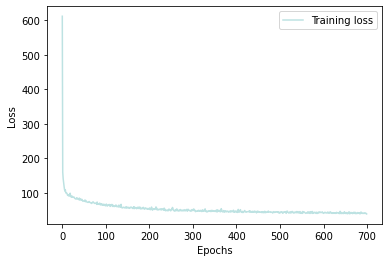

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step - loss: 92.1508


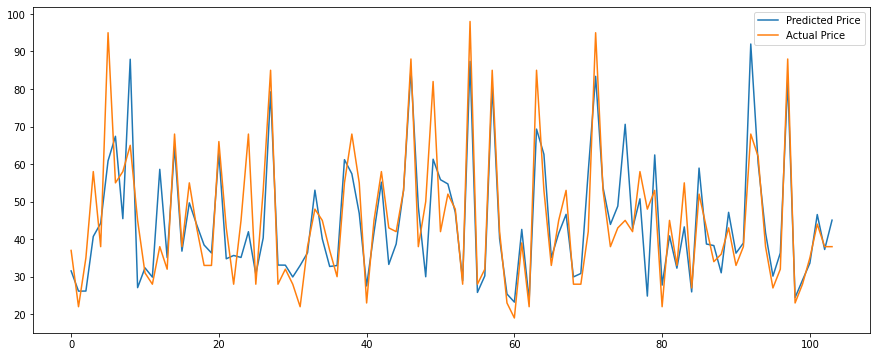

In [ ]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,6)
plt.plot(y_pred, label = 'Predicted Price')
plt.plot(y_test.to_numpy(),label = 'Actual Price')
plt.legend()
plt.show()

Using MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
data

,tomato,DAP_Price,Urea_Price,Diesel_Price,avg_temp,avg_rain_mm,humidity,prev_week_price
Date,,,,,,,,
2013-04-23,29.0,40105.32,31799.51,252.22,9.16,2.24,8.78,25
2013-04-24,29.0,40105.32,31799.51,252.22,10.76,0.97,8.67,27
2013-04-25,28.0,40105.32,31799.51,252.22,12.57,0.08,8.06,26
2013-04-26,28.0,40105.32,31799.51,252.22,12.45,0.33,7.95,26
2013-04-27,28.0,40105.32,31799.51,252.22,12.36,2.38,8.07,26
...,...,...,...,...,...,...,...,...
2018-12-28,42.0,44145.48,31343.78,204.03,11.37,0.05,2.88,38
2018-12-29,48.0,44145.48,31343.78,204.03,14.70,0.00,2.22,38
2018-12-30,48.0,44145.48,31343.78,204.03,11.68,0.00,2.44,38


In [ ]:
train, test = train_test_split(data, test_size=0.05)

In [ ]:
y_train = train['tomato'].to_numpy()
y_test = test['tomato'].to_numpy()
x_train = train.drop(['tomato'], axis = 1).to_numpy()
x_test = test.drop(['tomato'], axis =1).to_numpy()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=400,random_state=1, max_iter=700).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


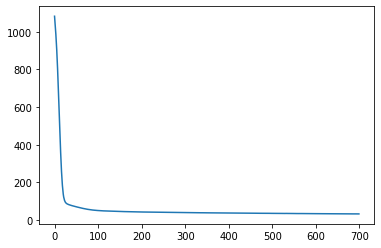

In [ ]:
plt.plot(regr.loss_curve_)

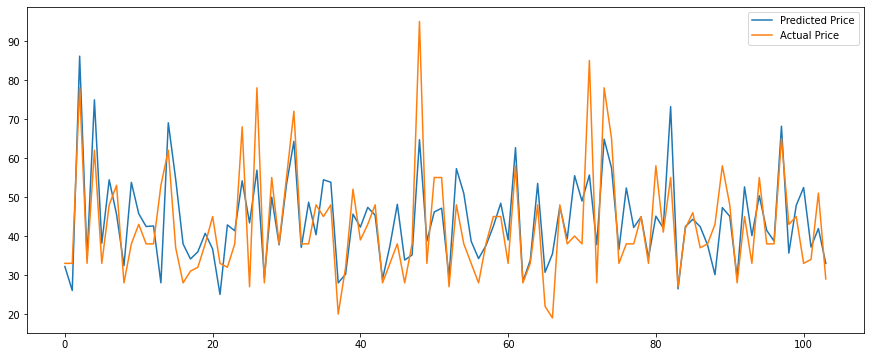

In [ ]:
a =  regr.predict(X_test)
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,6)
plt.plot(a, label='Predicted Price')
plt.plot(y_test, label = 'Actual Price')
plt.legend()

In [ ]:
print(regr.loss_)

33.136896263186536


Univariate LSTM Modelling

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data1 = data
data = data['tomato']

In [ ]:
dataset = data.values
dataset = dataset.astype('float32').reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1398 689


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.17 RMSE
Test Score: 5.32 RMSE


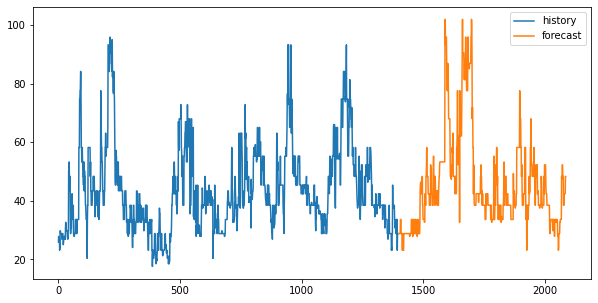

In [ ]:
from matplotlib.pyplot import figure

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,label = 'history')
plt.plot(testPredictPlot,label = 'forecast')
plt.legend()
plt.show()


<h3>Stock price prediction

In [ ]:
closing_price = pd.read_csv('drive/MyDrive/gdrive_folder/Stock_price_forecast/NLI_data.csv')
closing_price = closing_price.set_index('Date')

In [ ]:
closing_price = closing_price['closing_price']

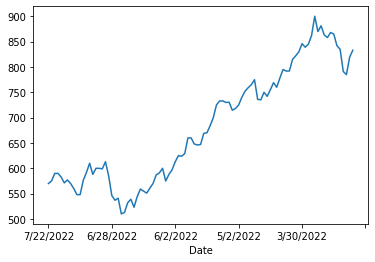

In [ ]:
closing_price.plot()

In [ ]:
dataset = closing_price.values
dataset = dataset.astype('float32').reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

64 33


In [ ]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
62/62 - 4s - loss: 0.0657 - 4s/epoch - 57ms/step
Epoch 2/50
62/62 - 0s - loss: 0.0284 - 210ms/epoch - 3ms/step
Epoch 3/50
62/62 - 0s - loss: 0.0199 - 163ms/epoch - 3ms/step
Epoch 4/50
62/62 - 0s - loss: 0.0171 - 206ms/epoch - 3ms/step
Epoch 5/50
62/62 - 0s - loss: 0.0150 - 165ms/epoch - 3ms/step
Epoch 6/50
62/62 - 0s - loss: 0.0131 - 189ms/epoch - 3ms/step
Epoch 7/50
62/62 - 0s - loss: 0.0115 - 217ms/epoch - 3ms/step
Epoch 8/50
62/62 - 0s - loss: 0.0096 - 142ms/epoch - 2ms/step
Epoch 9/50
62/62 - 0s - loss: 0.0081 - 183ms/epoch - 3ms/step
Epoch 10/50
62/62 - 0s - loss: 0.0062 - 157ms/epoch - 3ms/step
Epoch 11/50
62/62 - 0s - loss: 0.0048 - 172ms/epoch - 3ms/step
Epoch 12/50
62/62 - 0s - loss: 0.0037 - 159ms/epoch - 3ms/step
Epoch 13/50
62/62 - 0s - loss: 0.0029 - 189ms/epoch - 3ms/step
Epoch 14/50
62/62 - 0s - loss: 0.0022 - 170ms/epoch - 3ms/step
Epoch 15/50
62/62 - 0s - loss: 0.0018 - 170ms/epoch - 3ms/step
Epoch 16/50
62/62 - 0s - loss: 0.0016 - 172ms/epoch - 3ms/step
Epo

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.13 RMSE
Test Score: 26.56 RMSE


In [ ]:
dataset = scaler.inverse_transform(dataset)

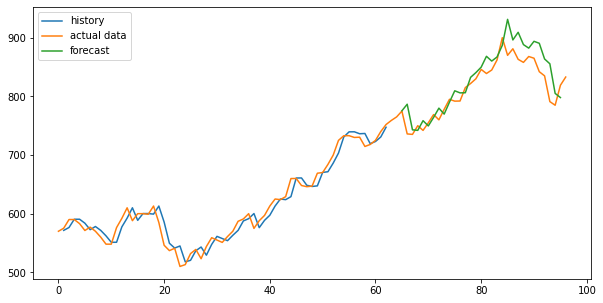

In [ ]:
from matplotlib.pyplot import figure

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,label = 'history')
plt.plot(dataset, label = 'actual data')
plt.plot(testPredictPlot,label = 'forecast')
plt.legend()
plt.show()
